In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x = pd.read_csv('ovarian_cancerY.csv', header=None)

In [16]:
labels = pd.read_csv('ovarian_cancer_grp.csv', header=None)

In [4]:
x = x.T

In [5]:
x

,0,1,2,3,4,5,6,7,8,9,...,14990,14991,14992,14993,14994,14995,14996,14997,14998,14999
0,0.097044,0.109940,0.130760,0.170930,0.165680,0.170840,0.171300,0.151740,0.132200,0.159420,...,0.001533,0.006324,0.003863,0.015751,0.028215,0.026312,0.020241,0.031998,0.040492,0.047161
1,0.065221,0.108920,0.153680,0.196610,0.205470,0.228110,0.217770,0.202740,0.160390,0.141550,...,0.039307,0.048933,0.056367,0.039243,0.006035,0.003967,0.030555,0.056087,0.050519,0.038994
2,0.080745,0.105080,0.134210,0.165640,0.159810,0.179360,0.188540,0.184040,0.187080,0.175410,...,0.033520,0.040522,0.048022,0.033026,0.020556,0.021642,0.017161,0.004715,0.013811,0.025288
3,0.115690,0.116620,0.133380,0.195540,0.192280,0.180400,0.196040,0.198720,0.173530,0.144080,...,0.034289,0.050247,0.052444,0.027980,0.015724,0.042677,0.072540,0.086192,0.073603,0.060128
4,0.092124,0.100540,0.112570,0.119400,0.113380,0.103230,0.093086,0.101040,0.151610,0.162770,...,0.011757,0.016846,0.028450,0.032914,0.029125,0.053310,0.063456,0.051392,0.024522,-0.001786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.080488,0.061790,0.057791,0.073588,0.080470,0.084023,0.088232,0.097565,0.086802,0.072722,...,0.026808,0.022818,0.014763,0.011817,0.010543,0.001452,-0.001171,0.007329,0.021296,0.035113
212,0.051982,0.068565,0.086436,0.098018,0.113010,0.113130,0.100540,0.101610,0.104090,0.097123,...,0.009567,0.023404,0.038047,0.044016,0.052350,0.054626,0.038809,0.019540,0.022541,0.027594
213,0.023482,0.036036,0.053269,0.076061,0.071301,0.064008,0.059959,0.073831,0.065935,0.048028,...,0.026115,0.026615,0.027872,0.030449,0.027307,0.013349,0.011723,0.018312,0.019686,0.016553
214,0.055729,0.073022,0.097375,0.127510,0.131810,0.127920,0.149410,0.148420,0.126160,0.110060,...,0.040197,0.045514,0.027957,0.019837,0.017701,0.019901,0.019325,0.037866,0.058761,0.078826


In [17]:
labels

,0
0,Cancer
1,Cancer
2,Cancer
3,Cancer
4,Cancer
...,...
211,Normal
212,Normal
213,Normal
214,Normal


In [8]:
x_np = x.to_numpy()

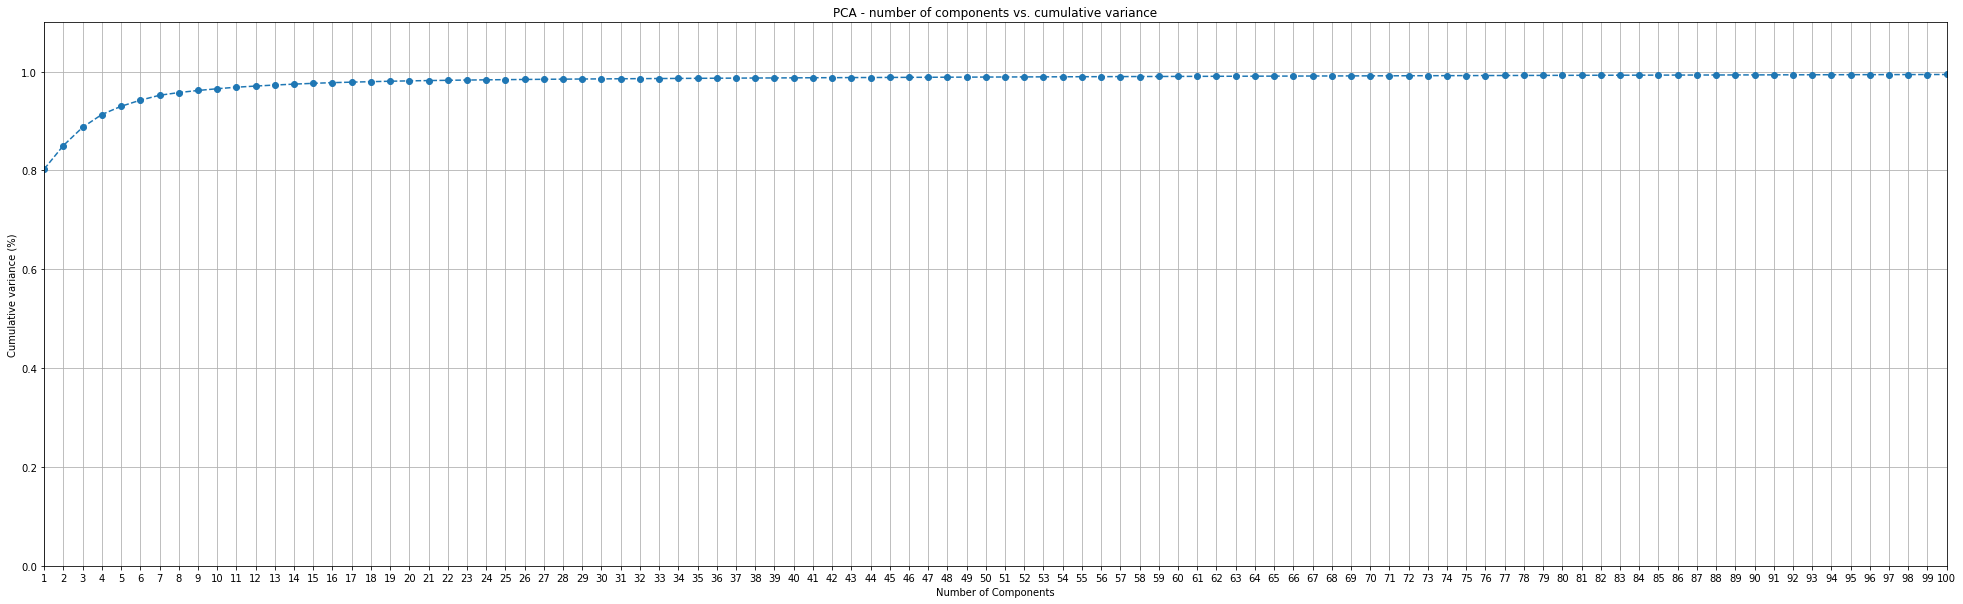

In [14]:
pca = PCA().fit(x_np)
plt.figure(1, figsize=(20,10))
xi = np.arange(1, x.shape[0]+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi[0:100], y[0:100], marker='o', linestyle='--')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 101, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('PCA - number of components vs. cumulative variance')

plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
#s = maxsize/plt.gcf().dpi*x_np.shape[0]+2*m
s = maxsize/plt.gcf().dpi*100+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.show()
#plt.savefig('pca_plot_samples.svg')

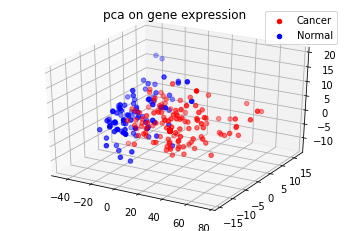

In [34]:
pca_obj = PCA(n_components=3)
pca = pca_obj.fit_transform(x_np)
cdict = {'Cancer': 'red', 'Normal': 'blue'}
group = labels.values

ig = plt.subplots()
ax = plt.axes(projection='3d')
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter3D(pca[ix,0], pca[ix,1], pca[ix,2], c = cdict[g], label = g)
ax.legend()
plt.title("pca on gene expression")
plt.grid()
plt.show()

In [35]:
print(pca_obj.components_)

[[ 4.26897064e-04  4.98497685e-04  6.63929523e-04 ...  3.19776784e-04
   2.70441851e-04  2.09978130e-04]
 [-9.75979861e-04 -7.97127463e-04 -9.98423358e-04 ...  1.32701656e-04
  -1.48395437e-04 -4.43598120e-04]
 [ 2.92307034e-03  2.13157959e-03  1.16331297e-03 ...  5.66330384e-05
   1.36949620e-04  1.91064197e-04]]
